In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
skin = pd.read_csv('Skin/skin.data',delim_whitespace=True,names=['B','G','R','Class'])
skin.head()

,B,G,R,Class
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [5]:
skin.describe()

,B,G,R,Class
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [6]:
np.any(skin.isnull())

False

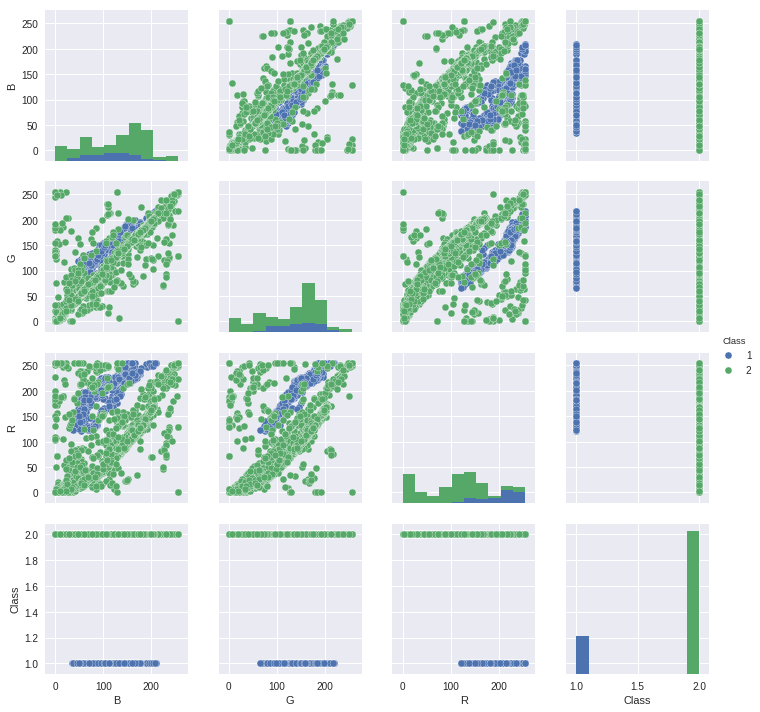

In [14]:
%matplotlib inline
sb.pairplot(skin.sample(n=3000,axis=0), hue='Class')

In [15]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m, groupSizes

In [46]:
skinData = skin.iloc[:,:-1].values.T
K = 2
R, M, m, groupSizes = KMeans(K, skinData, doPrinting=True)

Average distance to center within groups:
 [ 63.59131742  65.64993461]
Iterations:  15 

Group sizes:  [ 76523 168534] 



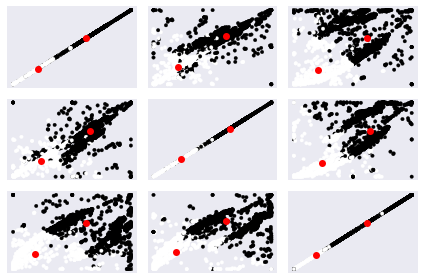

In [47]:
sample = np.random.randint(0,skinData.shape[1],3000)
d = skinData.shape[0]
for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(skinData[i, sample], skinData[j, sample], c=m[sample], marker='.')
        plt.plot(R[i,:], R[j,:], 'ro')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [48]:
for i in range(K):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in range(1,3):
        s = np.sum(M.T[i,skin.values[:,-1]==c])
        print(c, s, ' -> ', s/groupSizes[i])


Group:  0  # Size:  76523  # Results: 
1 8715  ->  0.113887327993
2 67808  ->  0.886112672007
Group:  1  # Size:  168534  # Results: 
1 42144  ->  0.250062301969
2 126390  ->  0.749937698031


In [49]:
K = 3
R, M, m, groupSizes = KMeans(K, skinData, doPrinting=True)

Average distance to center within groups:
 [ 38.19522063  53.60632211  62.15253182]
Iterations:  38 

Group sizes:  [118291  68420  58346] 



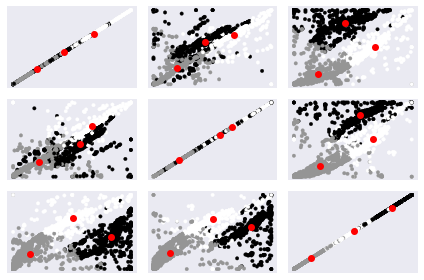

In [50]:
sample = np.random.randint(0,skinData.shape[1],3000)
d = skinData.shape[0]
for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(skinData[i, sample], skinData[j, sample], c=m[sample], marker='.')
        plt.plot(R[i,:], R[j,:], 'ro')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

In [51]:
for i in range(K):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in range(1,3):
        s = np.sum(M.T[i,skin.values[:,-1]==c])
        print(c, s, ' -> ', s/groupSizes[i])


Group:  0  # Size:  118291  # Results: 
1 6  ->  5.07223711018e-05
2 118285  ->  0.999949277629
Group:  1  # Size:  68420  # Results: 
1 3578  ->  0.0522946506869
2 64842  ->  0.947705349313
Group:  2  # Size:  58346  # Results: 
1 47275  ->  0.810252630857
2 11071  ->  0.189747369143
